# CS4243 Lab 1: Template Matching

- The functions to be implemented are given in `lab1.py`, along with the instructions for each function. You need to fill in the codes which start with `###Your code here###` and end with `###`
- The test images are given in folder "inputs".
- Most of these functions are available in build-in libraries, but you are not allowed to use them in this assignment, only numpy is allowed except `numpy.pad()`.
- Apart from the pdf instructions, we provide a detailed instruction for each function in `lab1.py`. Please check these instructions if you find it difficult to implement the codes.

**Attention:**
- Please be careful about the data type of the image!
- Please use python with version >= 3.5.4, and install the libs provided in requirements.txt via `pip install -r requirements.txt`.
- Please do not change the structure of files in the whole folder of this assignment, otherwise TA may mark your code wrongly.
- Please do not change the input arguments of the functions in `lab1.py`, otherwise your implementation would fail to pass the test.
- Except for the input parameters of `non_maximum_suppression`, please do not change other codes in this notebook

1. **Image preprossessing** 15% (rgb2gray, gray2grad, pad_zeros)
2. **Normalized Cross Correlation** 30% (normalized_cross_correlation, normalized_cross_correlation_fast, normalized_cross_correlation_matrix)
3. **Non-maximum Suppression** 10% (non_max_supression) 
4. **Template Matching** 45% (normalized_cross_correlation_ms, 5 short answer questions)

## Part 1 Image preprossessing (15%)
+ rgb2gray: 5 points
+ gray2grad: 5 points
+ pad_zeros: 5 points

Relative error of gray2grad() (<1e-8 will be fine): 0.0


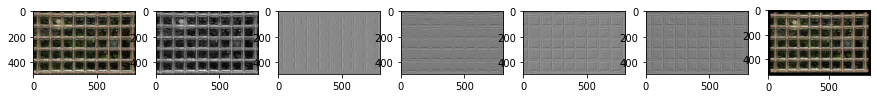

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'wallpaper.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))

# RGB image to grayscale image
img_gray = lab1.rgb2gray(img)
# Grayscale image to gradient image
img_grad_h, img_grad_v, img_grad_d1, img_grad_d2 = lab1.gray2grad(img_gray)
# Padding
img_pad = lab1.pad_zeros(img, 20, 20, 20, 20)

lab1.show_imgs([img, img_gray, img_grad_h, img_grad_v, img_grad_d1, img_grad_d2, img_pad])

# For evaluation purpose
sobelh = np.array([[-1, 0, 1], 
                   [-2, 0, 2], 
                   [-1, 0, 1]], dtype = float)
img_grad_h_cv2 = cv2.filter2D(img_gray.astype(float), -1, cv2.flip(sobelh, -1), borderType=cv2.BORDER_CONSTANT)
print('Relative error of gray2grad() (<1e-8 will be fine):', np.linalg.norm(img_grad_h - img_grad_h_cv2))

## Part 2 Normalized Cross-Correlation (30%)

+ normalized_cross_correlation: 10 points
+ normalized_cross_correlation_fast: 10 points
+ normalized_cross_correlation_matrix: 10 points

Runtime of normalized_cross_correlation(): 6.303068s
Runtime of normalized_cross_correlation_fast(): 0.305969s
Runtime of normalized_cross_correlation_matrix(): 0.096997s
Relative error of normalized_cross_correlation() (<1e-4 will be fine): 1.0666480944552366e-05
Relative error of normalized_cross_correlation_fast() (<1e-4 will be fine): 1.0666480944552366e-05
Relative error of normalized_cross_correlation_matrix() (<1e-4 will be fine): 1.0666480944552366e-05


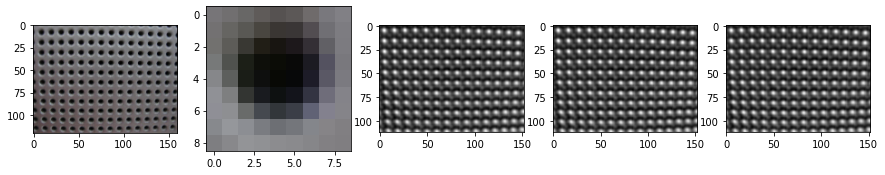

In [2]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
img = cv2.resize(img, (0, 0), fx=0.25, fy=0.25) # downsample the input image to save computation cost
template = img[5:14, 5:14]

t1 = time.time()
response = lab1.normalized_cross_correlation(img, template)
t2 = time.time()
response_fast = lab1.normalized_cross_correlation_fast(img, template)
t3 = time.time()
response_matrix = lab1.normalized_cross_correlation_matrix(img, template)
t4 = time.time()

print('Runtime of normalized_cross_correlation(): %fs'%(t2-t1))
print('Runtime of normalized_cross_correlation_fast(): %fs'%(t3-t2))
print('Runtime of normalized_cross_correlation_matrix(): %fs'%(t4-t3))


lab1.show_imgs([img, template, response, response_fast, response_matrix])

# For evaluation purpose
response_cv2 = cv2.matchTemplate(img, template, cv2.TM_CCORR_NORMED)
print('Relative error of normalized_cross_correlation() (<1e-4 will be fine):', np.linalg.norm(response - response_cv2))
print('Relative error of normalized_cross_correlation_fast() (<1e-4 will be fine):', np.linalg.norm(response_fast - response_cv2))
print('Relative error of normalized_cross_correlation_matrix() (<1e-4 will be fine):', np.linalg.norm(response_matrix - response_cv2))

## Part 3 Non-maximum Suppression (10%)

+ non_max_suppression: 10 points

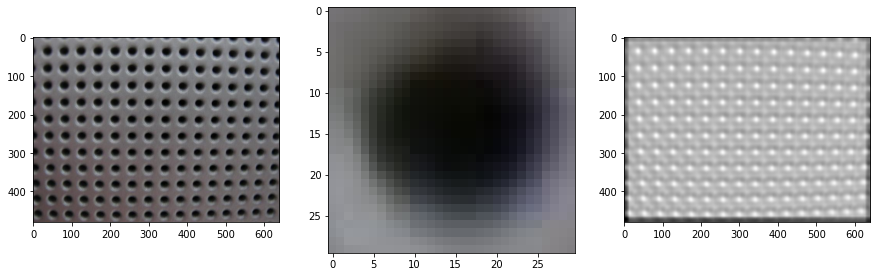

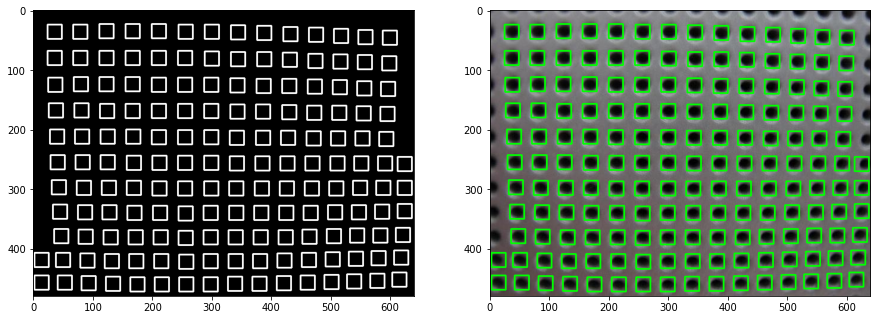

In [3]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[22:52, 22:52]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

# perform template matching
response = lab1.normalized_cross_correlation_fast(img_pad, template)

lab1.show_imgs([img, template, response])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res, img_ori=img)

## Part 4 Study on Template Matching (45%)

### 4.1 Image Inputs (5%)
No question in this part. You will get full marks if you achieve similar results.

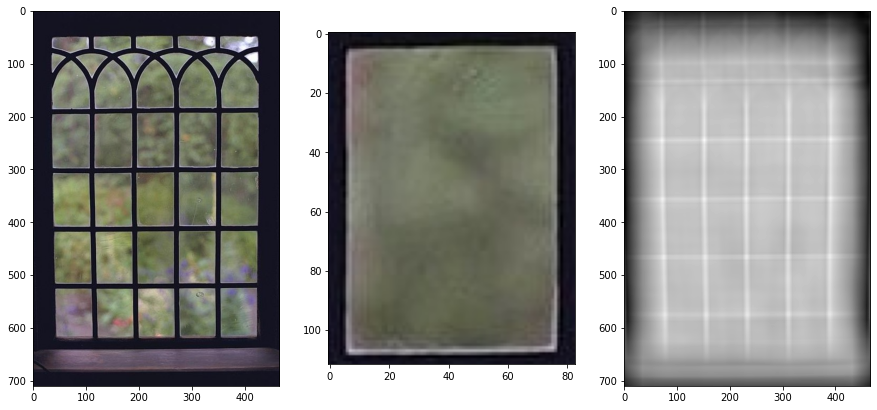

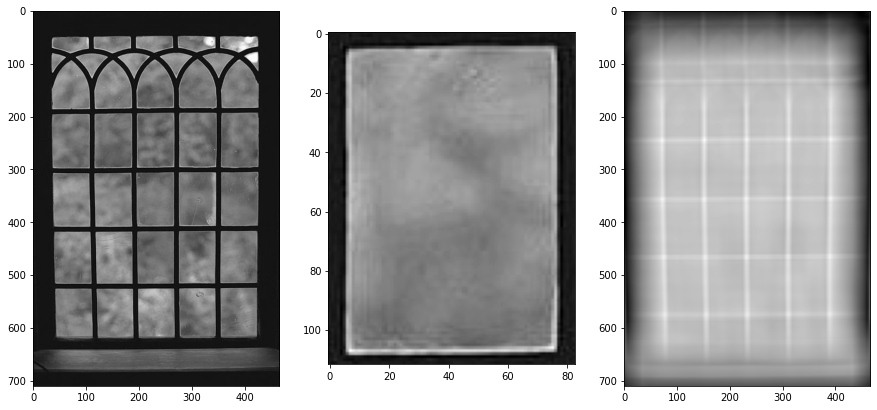

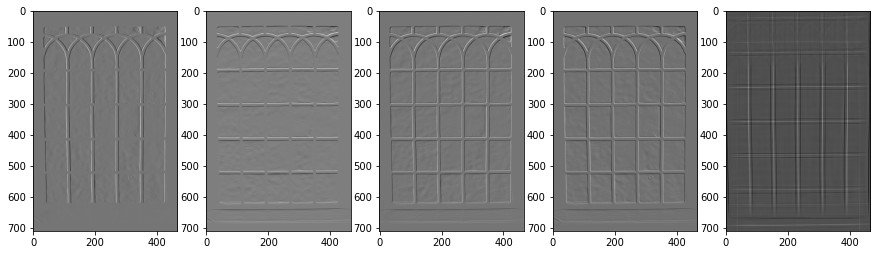

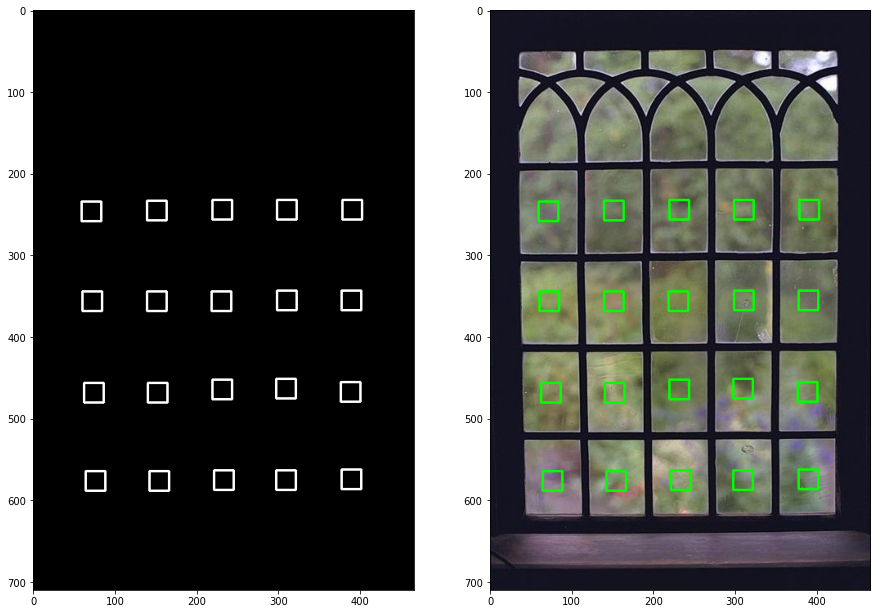

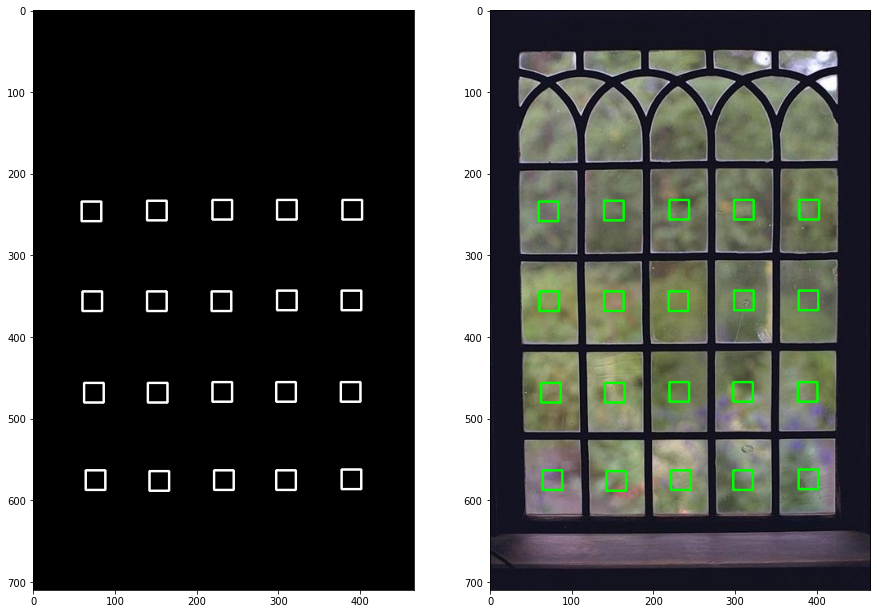

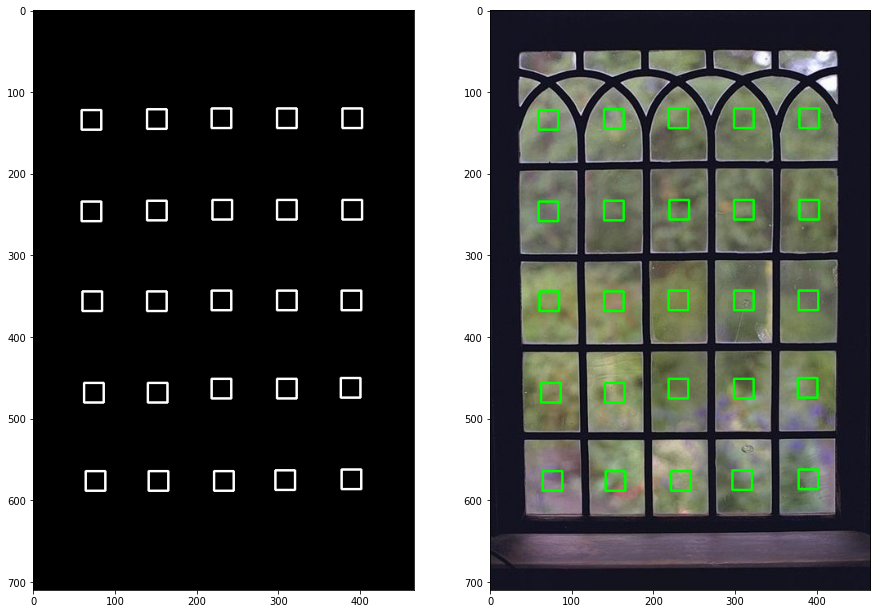

In [4]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import importlib
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'window.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[190:302, 110:193]

# RGB to grayscale
img_gray = lab1.rgb2gray(img)
template_gray = lab1.rgb2gray(template)

# RGB to grayscale
img_gray = lab1.rgb2gray(img)
template_gray = img_gray[190:302, 110:193]

# RGB to gradient map
img_grad_h, img_grad_v, img_grad_d1, img_grad_d2 = lab1.gray2grad(img_gray)
img_grad = np.stack([img_grad_h, img_grad_v, img_grad_d1, img_grad_d2], -1)
template_grad = img_grad[190:302, 110:193]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
img_gray_pad = lab1.pad_zeros(img_gray, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
img_grad_pad = lab1.pad_zeros(img_grad, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)


# perform match template
response = lab1.normalized_cross_correlation_fast(img_pad, template)
response_gray = lab1.normalized_cross_correlation_fast(img_gray_pad, template_gray)
response_grad = lab1.normalized_cross_correlation_fast(img_grad_pad, template_grad)



lab1.show_imgs([img, template, response])
lab1.show_imgs([img_gray, template_gray, response_gray])
lab1.show_imgs([img_grad[:,:,0], img_grad[:,:,1], img_grad[:,:,2], img_grad[:,:,3], response_grad])

# !!! Adjust the suppress range or threshold if you fail to detect 4x5 repetitive patterns in the image for RGB and grayscale inputs
res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res, img_ori=img)

res_gray = lab1.non_max_suppression(response_gray, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res_gray, img_ori=img)

res_grad = lab1.non_max_suppression(response_grad, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.3)
lab1.show_img_with_squares(res_grad, img_ori=img)

### 4.2 Template Inputs (6%)

+ Q&A: 6 points

Q: Explain why their response positions are different.

A: The reason the response positions are different is directly due to how template matching works.
In template matching, the template pixel values are element-wise multiplied to the pixel values of the sliding window of the input image.

There are two broad cases that can happen:

    1. In the case where the image window appears very similar (or indeed the same) with the template, all the template pixel values will correspond to the window pixel values, and the large pixel values will be multiplied proportionally. 
    
    2. In the case where the image window appears differently than the template, some large values will not be consistently multiplied proportionally, which will result in suboptimal sum of the element-wise products. This is very similar to how cosine similarity works in the case of (1D) vector, where the largest dot product of 2 vectors will happen when both of the vectors are indeed the same.

Thus, the response positions for each of the template will be different.

- For the first template, matching peaks will appear at the image windows where there are darker pixels in the rectangle in the center, and lighter pixels in the surrounding "border". This translates to the center position of the (physical) windows in the image.

- For the second template, matching peaks will appears at the image windows where there are darker pixels in the upper right rectangle, and lighter pixels in the bottom-left "border". This translates to the bottom left position of the (physical) windows in the image.

- For the third template, matching peaks will appears at the image windows where there are rectangular areas of darker pixels in the 4 corners, and lighter pixels in the midline cross-section area. This translates to position at the center of 4 neighboring (physical) windows in the image.


The response position is also different because the template used is different for each image. In addition, by using non maximum suppresion,the areas where there isnt a potential match will be reduced such that only areas where there is a maxima would be visible. This results in only areas where the template has high probability of matching(response peaks) being highlighted. 

In the example below, we also see a different response peak for the same image for each of the template corresponding to where the template matches the image. We can see this clearly when comparing the responses of the first template ( template with window centred) and the second template( template with slight offset). Here we can observe that there is a slight displacement in the location of the responses representing to where it matches exactly with the image for the first and second template.

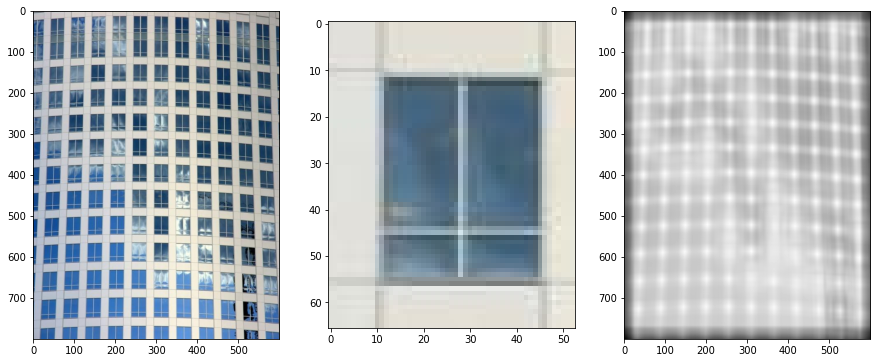

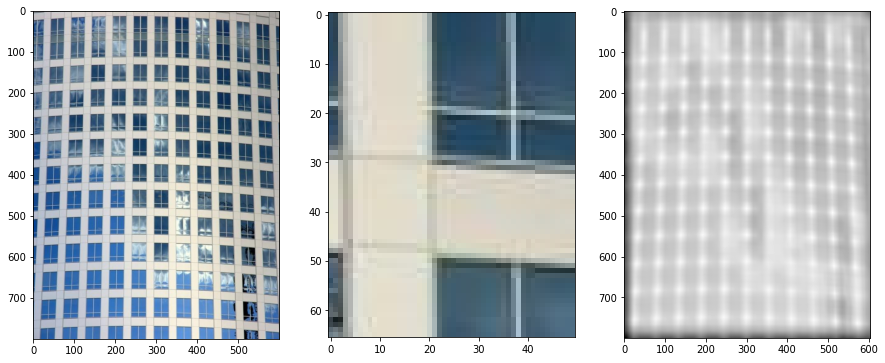

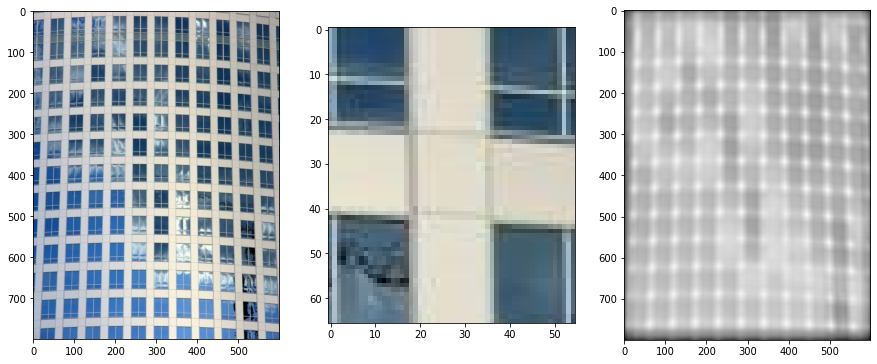

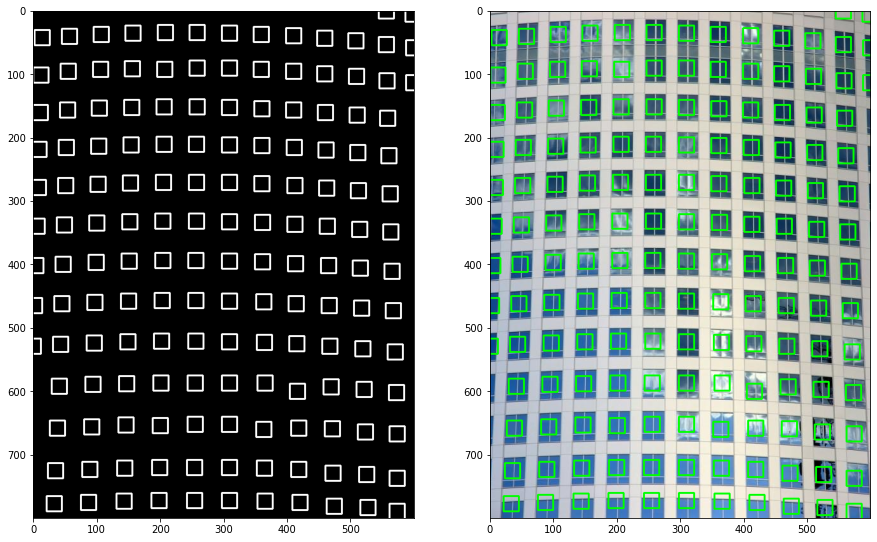

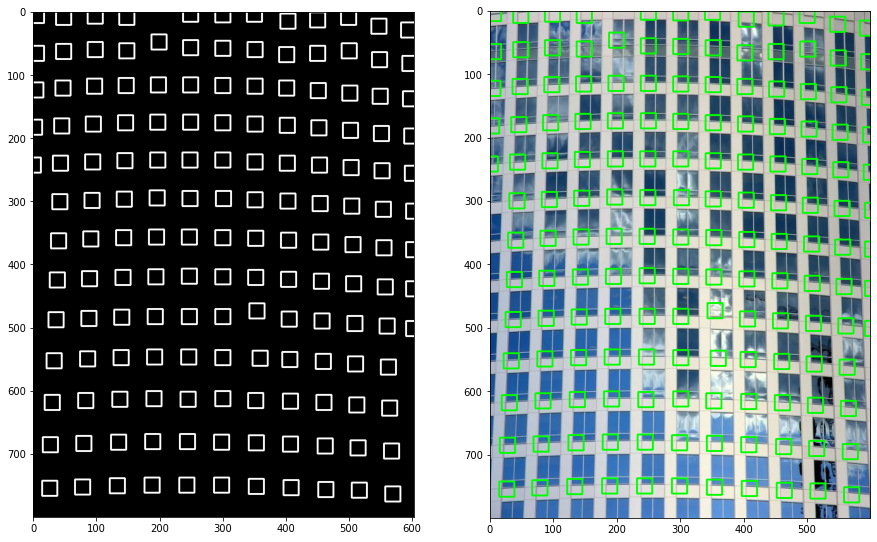

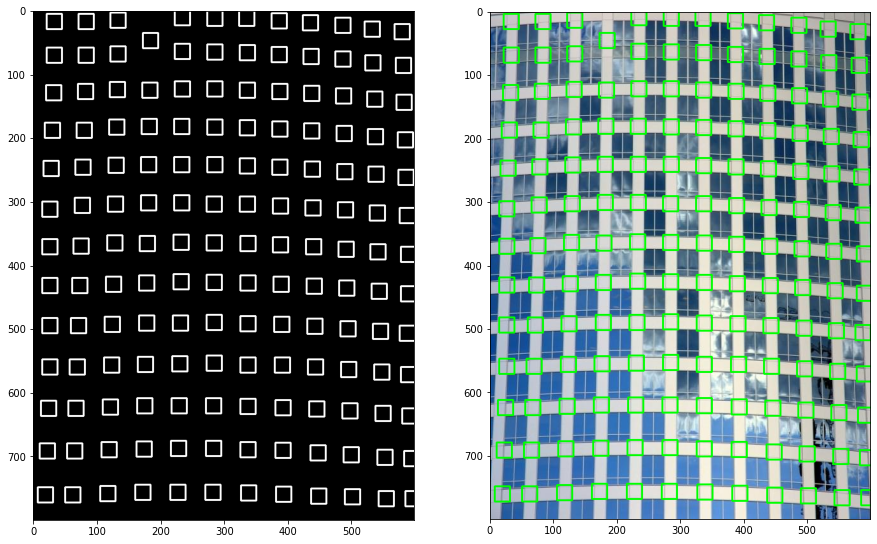

In [5]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
importlib.reload(lab1)


data_dir = 'inputs'
filename = 'building.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[425:491, 230:283]
template2 = img[394:460, 430:480]
template3 = img[400:466, 415:470]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)


# perform match template
response = lab1.normalized_cross_correlation_fast(img_pad, template)
response2 = lab1.normalized_cross_correlation_fast(img_pad, template2)
response3 = lab1.normalized_cross_correlation_fast(img_pad, template3)

lab1.show_imgs([img, template, response])
lab1.show_imgs([img, template2, response2])
lab1.show_imgs([img, template3, response3])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=None)
lab1.show_img_with_squares(res, img_ori=img)

res2 = lab1.non_max_suppression(response2, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=None)
lab1.show_img_with_squares(res2, img_ori=img)

res3 = lab1.non_max_suppression(response3, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=None)
lab1.show_img_with_squares(res3, img_ori=img)

### 4.3 Template Size (6%）

+ Q&A: 6 points

Q1: How can each of these templates to detect every hole present in the input image? 

A1:  This is because the parallel arrangements of the holes in the input image. As long as the template contains a hole at the center and has a symmetry either horizontal or vertical, then it will always be able to detect every holes (except the boundaries).  In our case each template has a whole in the middle with varying ammount of (symmetrical) surrounding holes, so indeed they are able to detect every holes in the input image.

Template matching works by sliding template kernel across the image and compares the similarities between the values of a given nxm template kernel together with the pixel values of an nxm frame within the image. Hence all possible matches of the kernel with the image will be highlighted regardless of the size of the kernel since it will iterate through each pixel. Therefore it doesnt matter if we use a template for 1x1/1x3/3x1/3x3 holes since template matching will detect all potential matches.

Q2: Analyze and explain the subtle differences in the output borders.

A2:  Basically the template will only detect the hole positions where it directly matches the template, meaning it also has the same (amount of) neighboring holes. Since each template has different amount of neighboring holes, the resulting detection will also be different.
- For the first template, it only contain one hole, so it will detect all holes in the image.
- For the second template, it contains one neighboring hole to the left and one to the right, so it will not detect the left and right boundary holes in the image where there is no neighboring hole either to the right or to the left.
- For the third template, it contains one neighboring hole at the top and one at the bottom, so it will not detect the top and bottom boundary holes in the image where there is no neighboring hole either to the top or to the bottom.
- For the fourth template, it contains one neighboring hole in all directions, inclusing the diagonals. So it will not detect all the top-bottom and left-right boundary holes.

Q3: Describe the correlation output with templates with a 1x1.5 or a 1x2 array of holes.

A3: 
- For a 1x1.5 template, it will depend on where the 0.5 appear in the template, either left or right. Either way, it will skip the boundary holes where it is too tight such that it does not have any margin to the left or the right of it (depending on the template). Also the position of the detections will not be at the center of the holes, but shifted a bit to the left or to the right.
- For a 1x2 template, it will simply detects the positions between two horizontally neighboring holes, instead of the holes itself.

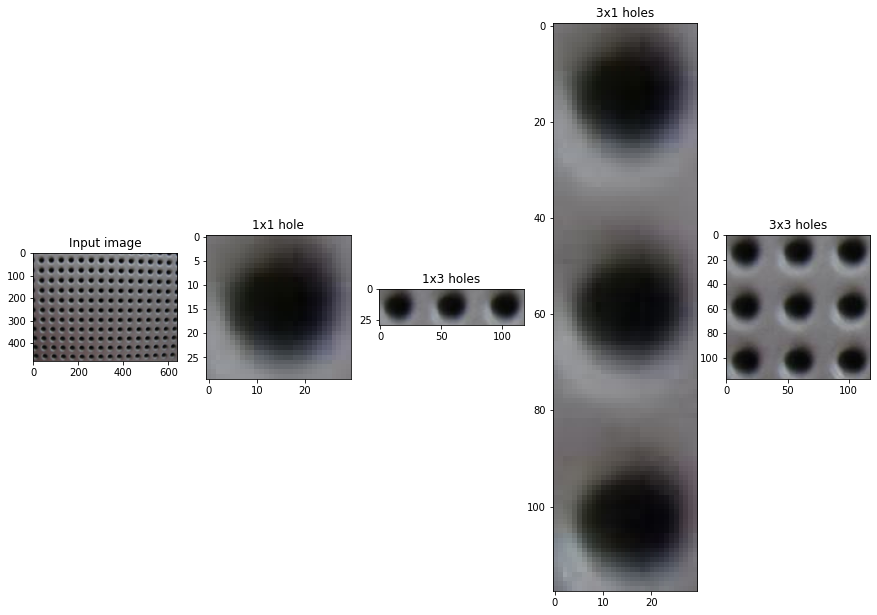

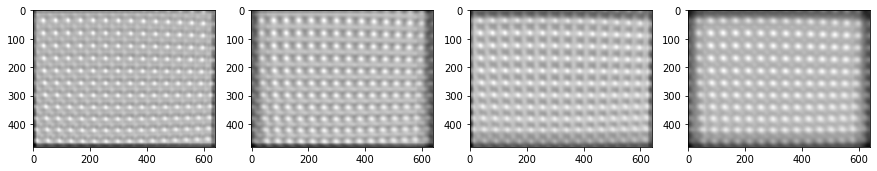

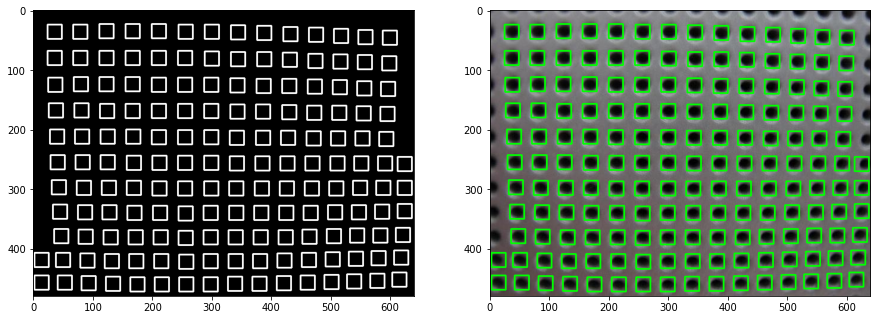

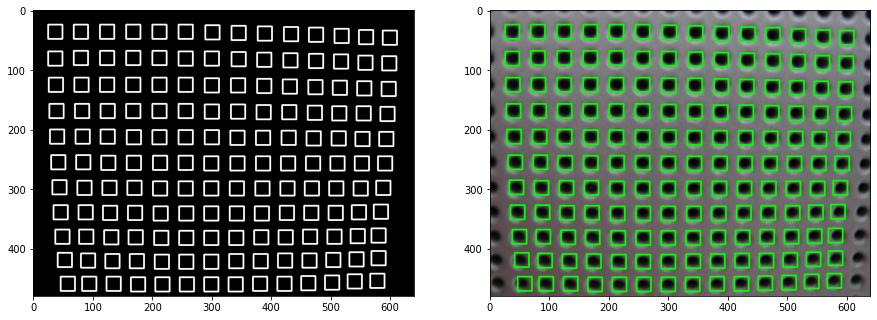

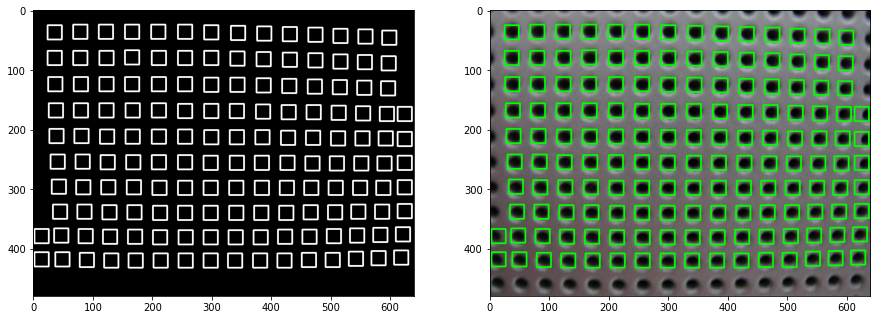

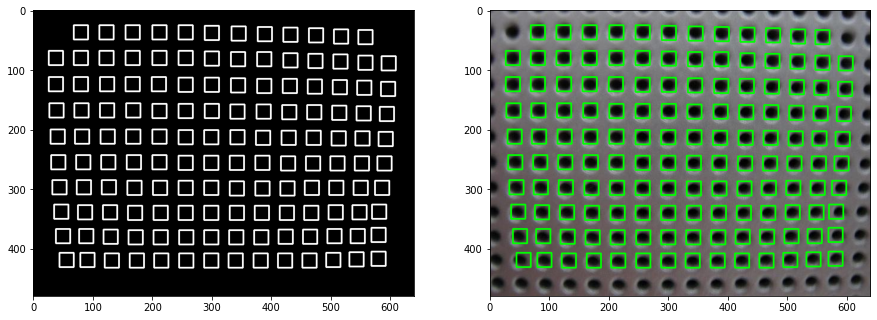

In [6]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import random
import lab1
importlib.reload(lab1)
random.seed(0)


data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[22:52, 22:52]
template2 = img[22:52, 22:140]
template3 = img[22:140, 22:52]
template4 = img[22:140, 22:140]


# Template 1x1
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response = lab1.normalized_cross_correlation_fast(img_pad, template)

# Template 1x3
pad_height_bef, pad_height_aft = template2.shape[0] // 2 - (1 if template2.shape[0] % 2 == 0 else 0), template2.shape[0] // 2
pad_width_bef, pad_width_aft = template2.shape[1] // 2 - (1 if template2.shape[1] % 2 == 0 else 0), template2.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response2 = lab1.normalized_cross_correlation_fast(img_pad, template2)

# Template 3x1
pad_height_bef, pad_height_aft = template3.shape[0] // 2 - (1 if template3.shape[0] % 2 == 0 else 0), template3.shape[0] // 2
pad_width_bef, pad_width_aft = template3.shape[1] // 2 - (1 if template3.shape[1] % 2 == 0 else 0), template3.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response3 = lab1.normalized_cross_correlation_fast(img_pad, template3)

# Template 3x3
pad_height_bef, pad_height_aft = template4.shape[0] // 2 - (1 if template4.shape[0] % 2 == 0 else 0), template4.shape[0] // 2
pad_width_bef, pad_width_aft = template4.shape[1] // 2 - (1 if template4.shape[1] % 2 == 0 else 0), template4.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response4 = lab1.normalized_cross_correlation_fast(img_pad, template4)

lab1.show_imgs([img, template, template2, template3, template4], titles=['Input image', '1x1 hole', '1x3 holes', '3x1 holes', '3x3 holes'])
lab1.show_imgs([response, response2, response3, response4])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res, img_ori=img)

res2 = lab1.non_max_suppression(response2, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res2, img_ori=img)

res3 = lab1.non_max_suppression(response3, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res3, img_ori=img)

res4 = lab1.non_max_suppression(response4, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res4, img_ori=img)

### 4.4 Mean-subtracted cross correlation (16%)

+ normalized_cross_correlation_ms: 10 points
+ Q&A: 6 points

Q: What are the benefits of subtracting the mean?

A: By subtracting with the mean, we will introduce negative values in both the template pixels and window pixels. What it means is, when we have a negative (or dark) pixel in the template and a positive (or light) pixel in the window, the resulting multiplication will also be a negative value (or dark) pixel. The same thing happen the other way around. This is already different than the non mean-subtracted one, where multiplication of dark and light pixels can sometimes result in neutral pixel or even light pixel, depending on the magnitude of the light value.

The most significant difference is actually in the case where both the template and the window pixel are dark. In the non mean subtracted one, this will result in usually an even more darker value. however in the mean-subtracted case, negative will multiply with negative resulting in a positive, meaning it will result in light value. Basically, it does not only encourage similarity in the lighter areas like the non mean-subtracted one already does, but it also encourage similarity in the darker areas. Plus, it also penalizes the mismatch of light pixel and dark pixel. These benefits will give a (usually) better template matching result.

Relative error of normalized_cross_correlation() (<1e-4 will be fine): 3.366314040525989e-05
Relative error of normalized_cross_correlation_ms() (<1e-3 will be fine): 0.00020202815691319992


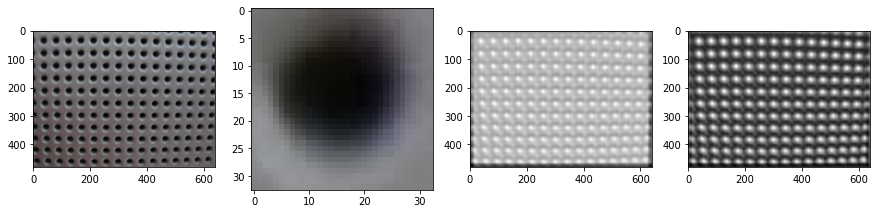

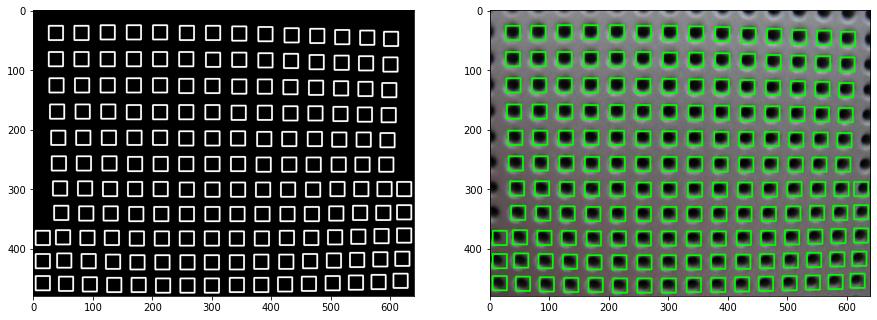

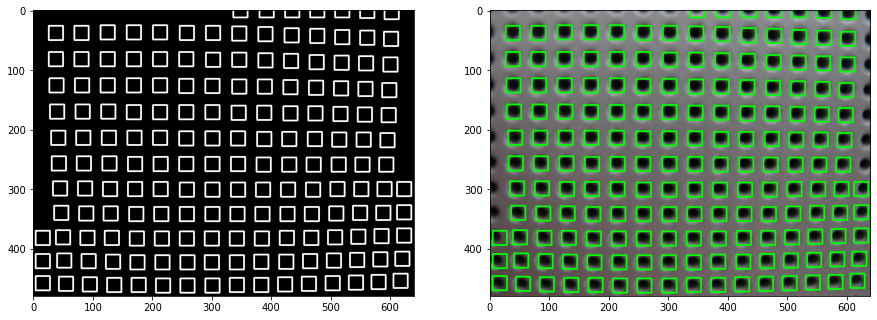

In [7]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[22:55, 22:55]


# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = lab1.normalized_cross_correlation_fast(img_pad, template)
response_ms = lab1.normalized_cross_correlation_ms(img_pad, template)

lab1.show_imgs([img, template, response, response_ms])

response_cv2 = cv2.matchTemplate(img_pad, template, cv2.TM_CCORR_NORMED)
response_cv2_ms = cv2.matchTemplate(img_pad, template, cv2.TM_CCOEFF_NORMED)
print('Relative error of normalized_cross_correlation() (<1e-4 will be fine):', np.linalg.norm(response - response_cv2))
print('Relative error of normalized_cross_correlation_ms() (<1e-3 will be fine):', np.linalg.norm(response_ms - response_cv2_ms))

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res, img_ori=img)
res_ms = lab1.non_max_suppression(response_ms, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.5)
lab1.show_img_with_squares(res_ms, img_ori=img)

### 4.5 Auto-Correlation (6%)

+ Q&A: 6 points

Q: Explain why the correlation output responses decrease as one gets further away from the center of the output.

A: In the case of auto-correlation where the template is the same as the input image, one must apply significant padding to the input image such that correlation can be performed over the whole part of the input, otherwise there will only be a single pixel in the output. Knowing this, the reason the phonemenon described happens is because the further away from the center of output, the larger 0-padded areas are being used in the correlation operation. This result in a steady decrease in response as one goes further from the center of the image.

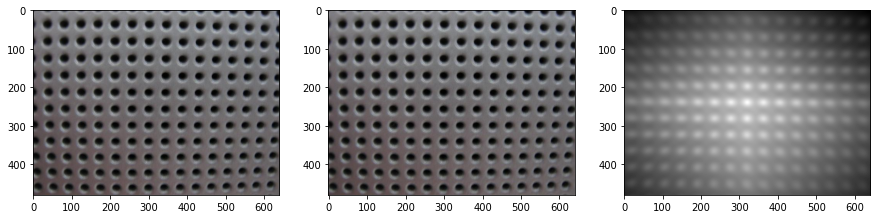

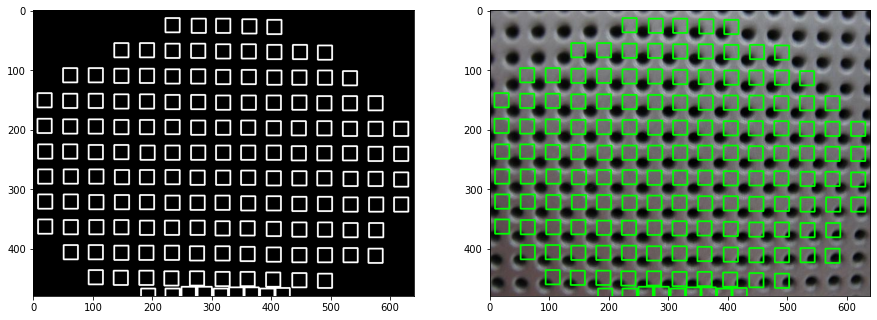

In [8]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img.copy()

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = cv2.matchTemplate(img_pad, template, cv2.TM_CCORR_NORMED)
lab1.show_imgs([img, template, response])

res = lab1.non_max_suppression(response, (26, 26), threshold=0.6)
lab1.show_img_with_squares(res, img_ori=img)

### 4.6 Limitations (6%)

+ Q&A: 6 points

Q: Observe the outputs and explain why template matching fails in certain regions of the image.

A: I believe this has something to do with the non max suppresion function which has been implemented, from the visualised response peaks shown(prior to the non max suppresion operation)we can see that the nor_crr identifies the potential template matches with the image. 

However after utilising non max suppresion, this results in some possible template matches being omitted.

There are 2 possibilities 

1. For darker areas such as those found nearer to the top of the image(overlapping fence 0-100), the correlation result does not give high enough peaks, with some even being lower than the non peak areas which can be found in the sky regions. Hence there is a possibility that response matches are discarded during the thresholding step of nms.

2. Another possibility would be that nms - chooses the objects with high probability as a potential match(a candidate) and hence the bounding boxes with weak responses may have been interpreted as neighbours which are overlapping with the main bounding box of the potential match(candidate). 

    Hence if the neighouring bounding box have a high IOU with the potential candidate this may have resulted in the neighbouring bounding box(template matches with low probability) being surpressed and hence ommitted from the final image prediction.

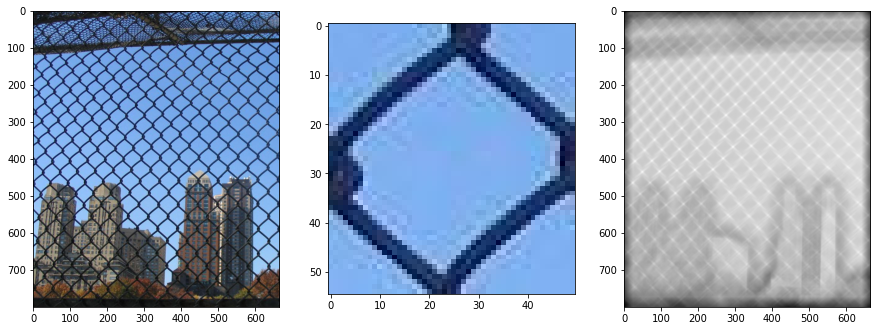

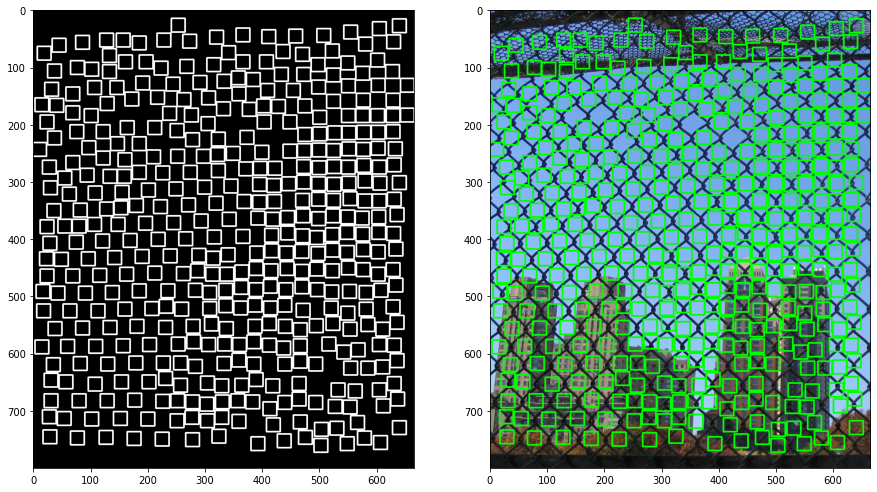

In [9]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'fence.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[310:365, 295:345]
# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = lab1.normalized_cross_correlation_fast(img_pad, template)

lab1.show_imgs([img, template, response])


res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.5), int(template.shape[1] * 0.5)), threshold=0.8)
lab1.show_img_with_squares(res, img_ori=img)


**Congrats! You have completed all tasks for lab 1.**